In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
X=df.drop('class',axis=1)
X=pd.get_dummies(X,drop_first=True)
y=df['class']

In [6]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
model=GradientBoostingClassifier()

In [13]:
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [14]:
y_pred=model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [17]:
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

* zero misclassification on default parameters

# using grid search

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid={'n_estimators':[50,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5]} 

In [21]:
gb_model=GradientBoostingClassifier()

In [22]:
grid=GridSearchCV(gb_model,param_grid)

In [23]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [24]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [25]:
pred=grid.predict(X_test)

In [28]:
pred

array(['e', 'p', 'p', ..., 'p', 'p', 'p'], dtype=object)

In [26]:
confusion_matrix(y_test,pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [29]:
grid.best_estimator_.feature_importances_

array([ 6.27716317e-04,  4.94631820e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.76351448e-03,  9.22742232e-17,  1.29900766e-04,
        0.00000000e+00,  0.00000000e+00,  5.39625717e-18,  0.00000000e+00,
        3.75046128e-17,  0.00000000e+00,  0.00000000e+00,  1.79423713e-06,
        0.00000000e+00,  5.65271445e-02,  0.00000000e+00,  8.58753831e-03,
        5.92652363e-03,  4.32483118e-10,  6.24456549e-01,  1.77078598e-02,
        0.00000000e+00,  0.00000000e+00,  4.01776589e-07,  5.09319738e-03,
        2.09509869e-03,  0.00000000e+00,  2.49709650e-16,  1.92462153e-17,
       -5.53802941e-17,  0.00000000e+00,  0.00000000e+00,  2.73351084e-15,
        3.14748751e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.03293314e-05,  1.27347162e-01,  1.24912801e-02,
        1.88290780e-02,  1.44436634e-03,  5.49638900e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.11446429e-02,  1.21434770e-08,
        0.00000000e+00,  

In [30]:
feat_imp=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importances'])

In [31]:
feat_imp.head()

,Importances
cap-shape_c,6.277163e-04
cap-shape_f,4.946318e-17
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00


In [46]:
data=feat_imp[feat_imp['Importances']>0.005].sort_values('Importances')

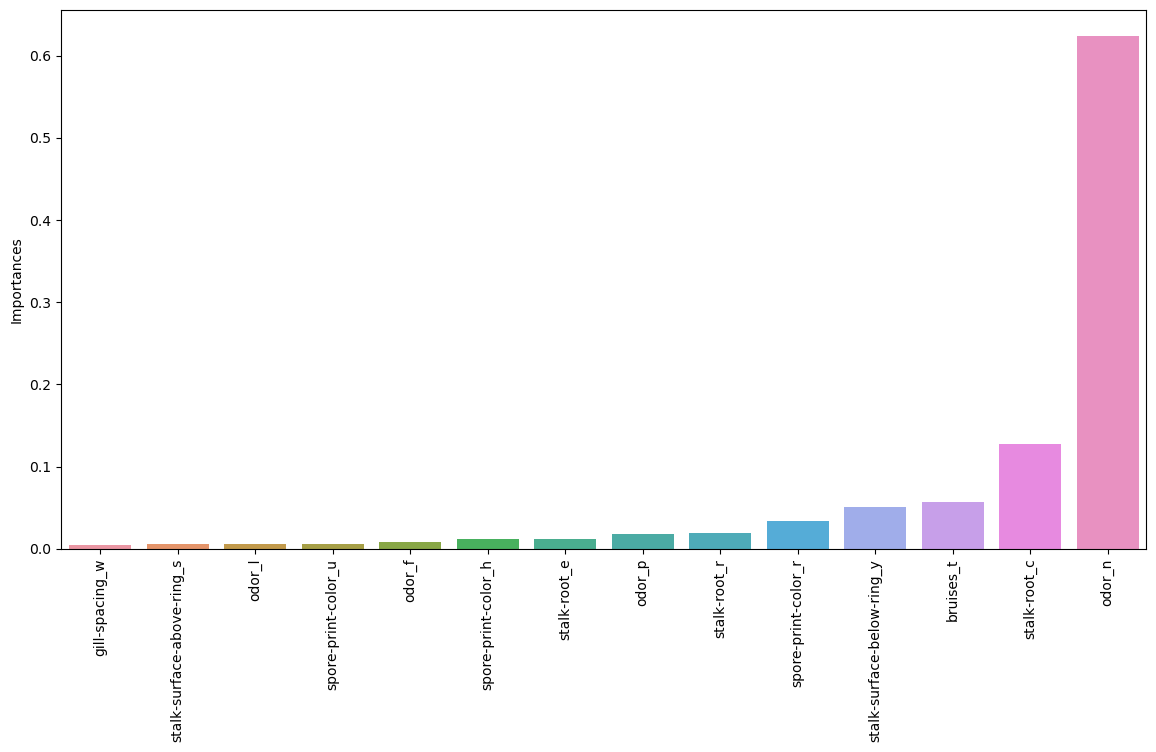

In [47]:
plt.figure(figsize=(14,7))
sns.barplot(data=data,x=data.index,y='Importances')
plt.xticks(rotation=90);